<a href="https://colab.research.google.com/github/kat-le/cmpe255-pycaret/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret kaggle
!kaggle -v

Kaggle API 1.7.4.5


In [2]:
import pycaret
pycaret.__version__

'3.3.2'

In [3]:
from google.colab import files
up = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

Saving kaggle.json to kaggle.json
total 16
drwxr-xr-x 2 root root 4096 Oct 31 23:38 .
drwx------ 1 root root 4096 Oct 31 23:38 ..
-rw------- 1 root root   65 Oct 31 23:38 kaggle.json


In [4]:
!mkdir -p data
!kaggle datasets download -d agajorte/detroit-daily-temperatures-with-artificial-warming -p data --unzip
!ls -lah data

Dataset URL: https://www.kaggle.com/datasets/agajorte/detroit-daily-temperatures-with-artificial-warming
License(s): CC0-1.0
  0% 0.00/20.8k [00:00<?, ?B/s]
100% 20.8k/20.8k [00:00<00:00, 41.6MB/s]
total 64K
drwxr-xr-x 2 root root 4.0K Oct 31 23:38 .
drwxr-xr-x 1 root root 4.0K Oct 31 23:38 ..
-rw-r--r-- 1 root root  55K Oct 31 23:38 weather-complete.csv


In [5]:
import pandas as pd
import glob, os

csvs = sorted(glob.glob(os.path.join("data", "**", "*.csv"), recursive=True))
csvs

['data/weather-complete.csv']

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import glob, os

# Find the CSV file in the new data directory
csv_files = glob.glob(os.path.join("data", "*.csv"))
if not csv_files:
    raise FileNotFoundError("No CSV file found in data directory.")
new_csv_path = csv_files[0]


df = pd.read_csv(new_csv_path)

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df = df.set_index('date').sort_index()
df = df['temperature']

df = df.asfreq('D', fill_value=None).ffill()

# Filter data for the years 2015 to 2017
df = df.loc['2015':'2017']

display(df.head())

,temperature
date,
2015-01-01,-2.360181
2015-01-02,0.860455
2015-01-03,2.453313
2015-01-04,5.630171
2015-01-05,-7.140972


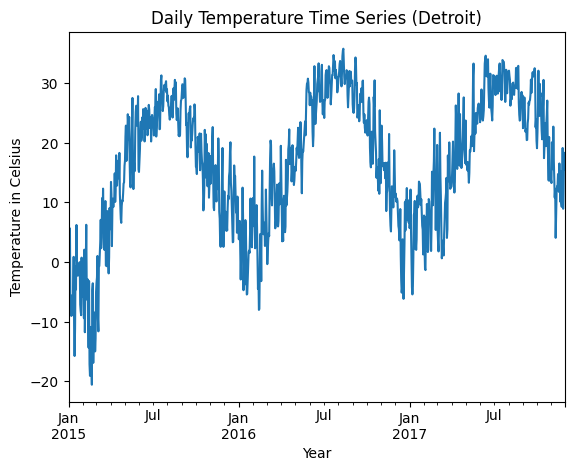

In [7]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd

df.plot()
plt.title('Daily Temperature Time Series (Detroit)')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.show()

In [8]:
from pycaret.time_series import *

s = setup(df, fh = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1064, 1)"
5,Transformed data shape,"(1064, 1)"
6,Transformed train set shape,"(1059, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [9]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [10]:
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [11]:
exp.setup(df, fh = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1064, 1)"
5,Transformed data shape,"(1064, 1)"
6,Transformed train set shape,"(1059, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [12]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1064.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,16.716506
3,Summary,Statistics,Transformed,Median,,17.759429
4,Summary,Statistics,Transformed,Standard Deviation,,11.130682
5,Summary,Statistics,Transformed,Variance,,123.892084
6,Summary,Statistics,Transformed,Kurtosis,,-0.257012
7,Summary,Statistics,Transformed,Skewness,,-0.565589
8,Summary,Statistics,Transformed,# Distinct Values,,1064.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",16786.657485


In [13]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.4796,0.4824,2.2957,2.9395,0.2922,0.2128,-0.5001,2.5867
ets,ETS,0.4998,0.5141,2.3930,3.1332,0.2974,0.2204,-0.8234,0.3400
exp_smooth,Exponential Smoothing,0.4999,0.5142,2.3932,3.1334,0.2974,0.2204,-0.8236,2.1233
theta,Theta Forecaster,0.5113,0.5076,2.4479,3.0930,0.3074,0.2245,-0.6932,0.0500
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.5576,0.5629,2.6683,3.4292,0.3685,0.2354,-0.9132,0.5667
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.6174,0.5582,2.9544,3.3999,0.3821,0.2562,-0.9032,0.2400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6343,0.6040,3.0358,3.6800,0.3886,0.2630,-1.2286,0.8200
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6456,0.6480,3.0895,3.9478,0.3995,0.2649,-1.6228,0.8967
auto_arima,Auto ARIMA,0.6529,0.5903,3.1242,3.5964,0.3873,0.2693,-1.1260,57.5333
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7344,0.6521,3.5148,3.9731,0.4164,0.2999,-1.7006,0.1867


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [14]:
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.4796,0.4824,2.2957,2.9395,0.2922,0.2128,-0.5001,0.0500
ets,ETS,0.4998,0.5141,2.3930,3.1332,0.2974,0.2204,-0.8234,0.3433
exp_smooth,Exponential Smoothing,0.4999,0.5142,2.3932,3.1334,0.2974,0.2204,-0.8236,1.7233
theta,Theta Forecaster,0.5113,0.5076,2.4479,3.0930,0.3074,0.2245,-0.6932,0.0500
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.5576,0.5629,2.6683,3.4292,0.3685,0.2354,-0.9132,0.7433
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.6174,0.5582,2.9544,3.3999,0.3821,0.2562,-0.9032,0.2433
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6343,0.6040,3.0358,3.6800,0.3886,0.2630,-1.2286,0.7200
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6456,0.6480,3.0895,3.9478,0.3995,0.2649,-1.6228,0.8867
auto_arima,Auto ARIMA,0.6529,0.5903,3.1242,3.5964,0.3873,0.2693,-1.1260,57.7033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7344,0.6521,3.5148,3.9731,0.4164,0.2999,-1.7006,0.1900


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

NaiveForecaster()

In [15]:
plot_model(best, plot = 'forecast')

In [16]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 18})

In [17]:
plot_model(best, plot = 'residuals')

In [18]:
# Create the ARIMA model
arima_model = create_model('arima')

plot_model(arima_model, plot = 'forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-11-09,1.1455,1.0518,5.4744,6.4003,0.7996,0.4780,-2.6485
1,2017-11-14,1.0390,0.9565,4.9799,5.8365,0.3565,0.4815,-11.0574
2,2017-11-19,0.6682,0.6047,3.2022,3.6882,0.3136,0.2614,-1.8946
Mean,NaT,0.9509,0.8710,4.5522,5.3083,0.4899,0.4070,-5.2001
SD,NaT,0.2046,0.1923,0.9757,1.1685,0.2197,0.1030,4.1531


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
plot_model(arima_model, plot = 'residuals')

In [20]:
plot_model(arima_model, plot = 'forecast', data_kwargs = {'fh' : 40})

In [21]:
holdout_pred = predict_model(arima_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.7149,0.5947,3.4201,3.6218,0.2493,0.2607,0.0890


In [22]:
holdout_pred.head()

,y_pred
2017-11-25,16.4402
2017-11-26,12.4805
2017-11-27,10.1210
2017-11-28,15.3000
2017-11-29,9.9006


In [23]:
predict_model(arima_model, fh = 40)

,y_pred
2017-11-25,16.4402
2017-11-26,12.4805
2017-11-27,10.1210
2017-11-28,15.3000
2017-11-29,9.9006
2017-11-30,9.3091
2017-12-01,11.6722
2017-12-02,16.5221
2017-12-03,12.5644
2017-12-04,10.2063


In [24]:
save_model(arima_model, 'forecast_arima')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ARIMA(seasonal_order=(0,
                                                                                       1,
                                                                                       0,
                                                                                       7)))]))]),
 'forecast_arima.pkl')

In [25]:
loaded_best_pipeline = load_model('forecast_arima')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ARIMA(seasonal_order=(0,
                                                                                      1,
                                                                                      0,
                                                                                      7)))]))])

# Task
Demonstrate the ARIMA model prediction in Gradio.

## Install gradio

### Subtask:
Install the gradio library.


**Reasoning**:
The subtask is to install the gradio library. I will use pip to install the library.



In [26]:
!pip install gradio

## Define prediction function

### Subtask:
Create a Python function that takes future horizon as input and returns the predicted temperatures using the loaded ARIMA model.


**Reasoning**:
Define a Python function that utilizes the loaded ARIMA model to generate future temperature predictions based on a given forecast horizon.



In [27]:
def forecast_temperature(future_horizon):
  """
  Generates future temperature predictions using the loaded ARIMA model.

  Args:
    future_horizon: The number of steps to forecast into the future.

  Returns:
    A pandas DataFrame containing the forecasted temperature values.
  """
  predictions = predict_model(loaded_best_pipeline, fh=future_horizon)
  return predictions

## Create gradio interface

### Subtask:
Build a Gradio interface using the prediction function and specify the input and output components.


**Reasoning**:
Build a Gradio interface using the prediction function and specify the input and output components.



In [28]:
import gradio as gr

iface = gr.Interface(
    fn=forecast_temperature,
    inputs=gr.Number(label="Future Horizon (days)"),
    outputs=gr.DataFrame(label="Predicted Temperatures")
)

## Launch gradio app

### Subtask:
Launch the Gradio interface to interact with the model.


**Reasoning**:
Launch the Gradio interface to allow interaction with the prediction function.



In [29]:
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0a95524233f3c1e98c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Data Analysis Key Findings

* The `gradio` library was already installed in the environment before the process began.
* A Python function, `forecast_temperature`, was created to utilize a pre-loaded ARIMA model from PyCaret for making future temperature predictions.
* A Gradio interface was successfully built using `gradio.Interface`, connecting the `forecast_temperature` function with a numeric input for the future horizon and a DataFrame output for the predictions.
* The Gradio interface was launched, making it accessible via a public URL.

### Insights or Next Steps

* The launched Gradio interface provides a user-friendly way to demonstrate the ARIMA model's prediction capabilities without requiring coding knowledge.
* The next steps could involve embedding this Gradio interface within a larger application or sharing the public URL with others to allow interaction with the model.
